In [224]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.signal import unit_impulse,fftconvolve,freqz
from numpy.lib.scimath import sqrt as csqrt
from scipy.special import iv
from scipy.fft import fft, fftfreq
pi = np.pi

## Project of a low-pass FIR filter by the Kaiser Window

In [260]:
def x(t): ## signal to be filtered
    y = np.cos(2*pi*60*t) + 2*np.cos(2*pi*600*t)
    return y

In [223]:
## iv = modified bessel function of the first kind
def w_n(alpha, beta, n):
    arg = beta*(1 - ((n - alpha)/alpha)**2)**0.5
    w = iv(0, arg)/iv(0, beta)
    return w

In [321]:
def Fourier(omega, h): ## Discrete Time Fourier Transform DTFT
    H = np.zeros(len(omega), dtype = 'complex')
    j = csqrt(-1)
    for i in range(len(omega)):
        parcel = 0
        for k in range(len(h)):
            parcel = parcel + h[k]*np.exp(-j*omega[i]*k)
        H[i] = parcel
    return H

## filter specifications

C:\Users\moise\AppData\Local\Temp\ipykernel_50024\3333975141.py:28: RuntimeWarning: invalid value encountered in true_divide
  hd_n = np.sin(wc*(n - alpha))/((pi*(n - alpha))) ## ideal impulse response
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, '$H(\\omega)$ dB')

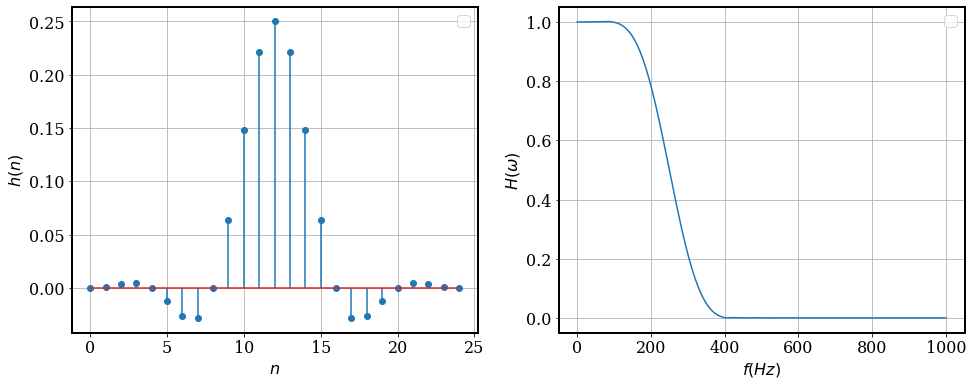

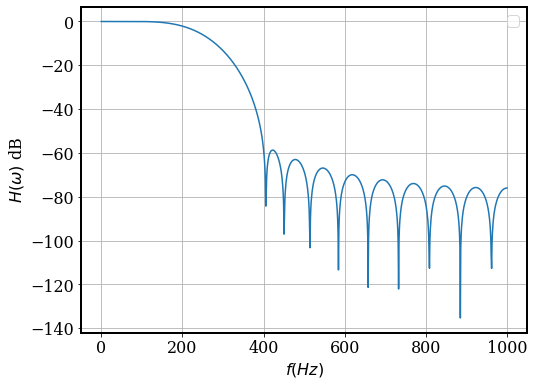

In [462]:
fs = 2000 ##Sampling rate
T = 1/fs
Omega_s = 2*pi*400 ## stop frequency
Omega_p = 2*pi*100 ## pass frequency
ws = Omega_s*T ## normalized frequency, omega = 2*pi*f*T, where T is the inverse of the sampling rate
wp = Omega_p*T
wc = (ws + wp)/2 ## cut-off frequency
deltaomega = ws - wp ## transition width
delta = 0.001 #- 60db

A = -20*np.log10(delta) ## parameter A of the Kaiser Window
if (A < 21): ## conditions for the parameter Beta of the Kaiser Window
    beta = 0
elif (A >= 21 and A <= 50):
    beta = 0.5842*(A - 21)**0.4 + 0.07886*(A - 21)
else:
    beta = 0.1102*(A - 8.7)

M = (A - 8)/(2.285*deltaomega) ## M + 1 is the length of the impulse response
if((int(M) + 1) % 2 == 0): ## M must be an even integer so the filter is from the type I
    M = int(M) + 1
else:
    M = int(M)

alpha = int(M)/2

n = np.arange(M + 1)
hd_n = np.sin(wc*(n - alpha))/((pi*(n - alpha))) ## ideal impulse response
h = hd_n*w_n(alpha, beta, n) ## impulse responde of the filter, DTFT (Discrete Time Fourier Transform)
h[int(alpha)] = wc/pi

omega = np.linspace(0, pi, 1000) ## normalized frequency, omega = 2*pi*f*T, T is the inverse of the sampling rate
freq_hz = omega/(2*pi*T)
H = Fourier(omega, h) ## frequency response of the filter, DTFT (Discrete Time Fourier Transform)

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)
plt.rc('axes', linewidth=2)

figure, ax = plt.subplots(1, 2, figsize = (16, 6))
ax[0].stem(n, h)
ax[0].grid(True)
ax[0].legend(loc = 'upper right')
ax[0].set_xlabel('$n$')
ax[0].set_ylabel('$h(n)$')

ax[1].plot(freq_hz, abs(H))
ax[1].grid(True)
ax[1].legend(loc = 'upper right')
ax[1].set_xlabel('$f (Hz)$')
ax[1].set_ylabel('$H(\omega)$')

figure = plt.figure(figsize = (8,6))
plt.plot(freq_hz, 20*np.log10(abs(H)))
plt.grid(True)
plt.legend(loc = 'upper right')
plt.xlabel('$f (Hz)$')
plt.ylabel('$H(\omega)$' + ' dB')

## Filtering the signal

Text(0.5, 1.0, '$Y(\\omega)$, filtered signal')

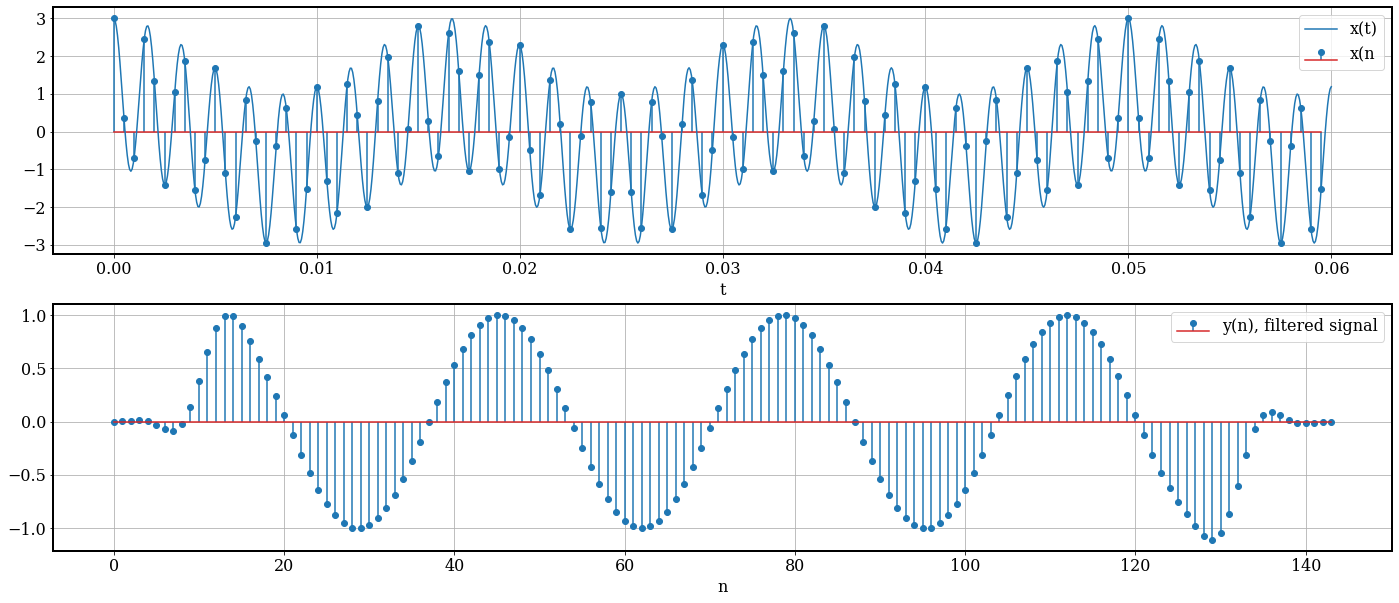

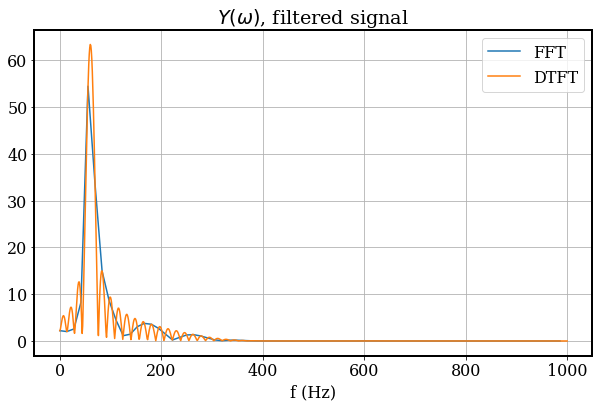

In [463]:
lim = 0.06
Samples = lim/T
t = np.linspace(0, lim, 1000)
k = np.arange(Samples)*T ## sampling the signal with sample rate 1/T

y = np.convolve(x(k), h) ## y(n) = x(n)*h(n)
size = len(x(k)) + len(h) - 1 ## length of the discrete convolution
position = np.arange(size)

freq = np.fft.fftfreq(int(size), d = T) ## FFT of y(n)
freq = freq[:freq.size//2] ## only the positive part of the spectrum
Y = np.fft.fft(y)
Y = Y[:Y.size//2] ## only the part where the domain is positive

a = np.linspace(0, pi, 1000)
b = Fourier(a, y) ## DTFT of the output signal, Discrete Time Fourier Transform

figure, ax = plt.subplots(2, 1, figsize = (24, 10))

ax[0].stem(k, x(k), label = 'x(n')
ax[0].plot(t, x(t), label = 'x(t)')
ax[0].grid(True)
ax[0].set_xlabel('t')
ax[0].legend(loc = 'upper right')

ax[1].stem(position, y, label = 'y(n), filtered signal')
ax[1].grid(True)
ax[1].set_xlabel('n')
ax[1].legend(loc = 'upper right')

figure = plt.figure(figsize = (10,6))
plt.plot(freq, abs(Y), label = 'FFT')
plt.grid(True)
plt.xlabel('f (Hz)')
plt.legend(loc = 'upper right')

plt.plot(a/(2*pi*T), abs(b), label = 'DTFT')
plt.grid(True)
plt.legend(loc = 'upper right')
plt.title('$Y(\omega)$' + ', filtered signal')